test 1

In [ ]:
import cartopy.crs as ccrs
import rasterio
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cm as cm

from rasterio.plot import show

import folium
import geopandas as gpd

In [2]:
raster = rasterio.open('fulltestTiff.tif')
lst = raster.read()
lst = lst.astype(float)
#print(lst)

meta = raster.meta
meta.update(driver='GTiff')
meta.update(dtype=rasterio.float64)

with rasterio.open('lst.tif', 'w', **meta) as dst:
    dst.write(lst)

[[[    0.     0.     0. ...     0.     0.     0.]
  [    0.     0.     0. ...     0.     0.     0.]
  [    0.     0.     0. ...     0.     0.     0.]
  ...
  [    0.     0.     0. ...     0.     0.     0.]
  [    0.     0.     0. ...     0.     0.     0.]
  [    0.     0.     0. ...     0.     0.     0.]]

 [[    0.     0.     0. ...     0.     0.     0.]
  [    0.     0.     0. ...     0.     0.     0.]
  [    0.     0.     0. ...     0.     0.     0.]
  ...
  [    0.     0.     0. ...     0.     0.     0.]
  [    0.     0.     0. ...     0.     0.     0.]
  [    0.     0.     0. ...     0.     0.     0.]]

 [[    0.     0.     0. ...     0.     0.     0.]
  [    0.     0.     0. ...     0.     0.     0.]
  [    0.     0.     0. ...     0.     0.     0.]
  ...
  [    0.     0.     0. ...     0.     0.     0.]
  [    0.     0.     0. ...     0.     0.     0.]
  [    0.     0.     0. ...     0.     0.     0.]]

 ...

 [[  255.   255.   255. ...   255.   255.   255.]
  [  255.   255.   2

In [3]:
#m = folium.Map(location=[35.9452,14.3797], zoom_start=10)
m = folium.Map(location=[14.3797,35.9452], zoom_start=10)

boundsdata = r'C:/Users/Massimo/Documents/SchoolFolder/ThirdYear/Thesis/MassThesis/src/References/malta.geojson'
region = gpd.read_file(boundsdata)
nReserve_proj = region.to_crs({'init': 'epsg:4326'})

C:\Users\Massimo\anaconda3\envs\snap\lib\site-packages\pyproj\crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


In [5]:
from rasterio.mask import mask

with rasterio.open("lst.tif") as src:
    out_image, out_transform = rasterio.mask.mask(src, nReserve_proj.geometry,crop=True)
    out_meta = src.meta.copy()
    out_meta.update({"driver": "GTiff",
                 "height": out_image.shape[1],
                 "width": out_image.shape[2],
                 "transform": out_transform})

with rasterio.open('cropped.tif', 'w', **meta) as dst:
    dst.write(out_image)

test 2 Working but hardcoded

In [27]:
import random
import rasterio
from rasterio.windows import Window

path_laptop = 'C:/Users/Massimo/Documents/SchoolFolder/ThirdYear/Thesis/SentinelData/TIF_files/S3B_SL_2_LST____20210616T094035_20210616T094335_20210617T190722_0179_053_307_2340_LN2_O_NT_004_LST.tif'

with rasterio.open(path_laptop) as src:

    # The size in pixels of your desired window
    #xsize, ysize = 512, 512
    xsize, ysize = 64, 64

    # Generate a random window location that doesn't go outside the image
    xmin, xmax = 0, src.width - xsize
    ymin, ymax = 0, src.height - ysize
    #xoff, yoff = random.randint(xmin, xmax), random.randint(ymin, ymax)
    xoff, yoff = 1270, 390

    # Create a Window and calculate the transform from the source dataset    
    window = Window(xoff, yoff, xsize, ysize)
    '''print('xoff: ' + str(xoff))
    print('yoff: ' + str(yoff))
    print('xsize: ' + str(xsize))
    print('ysize: ' + str(ysize))'''
    transform = src.window_transform(window)

    # Create a new cropped raster to write to
    profile = src.profile
    profile.update({
        'height': xsize,
        'width': ysize,
        'transform': transform})

    with rasterio.open('cropped.tif', 'w', **profile) as dst:
        # Read the data from the window and write it to the output raster
        dst.write(src.read(window=window))

test3

C:\Users\Massimo\anaconda3\envs\snap\lib\site-packages\pyproj\crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


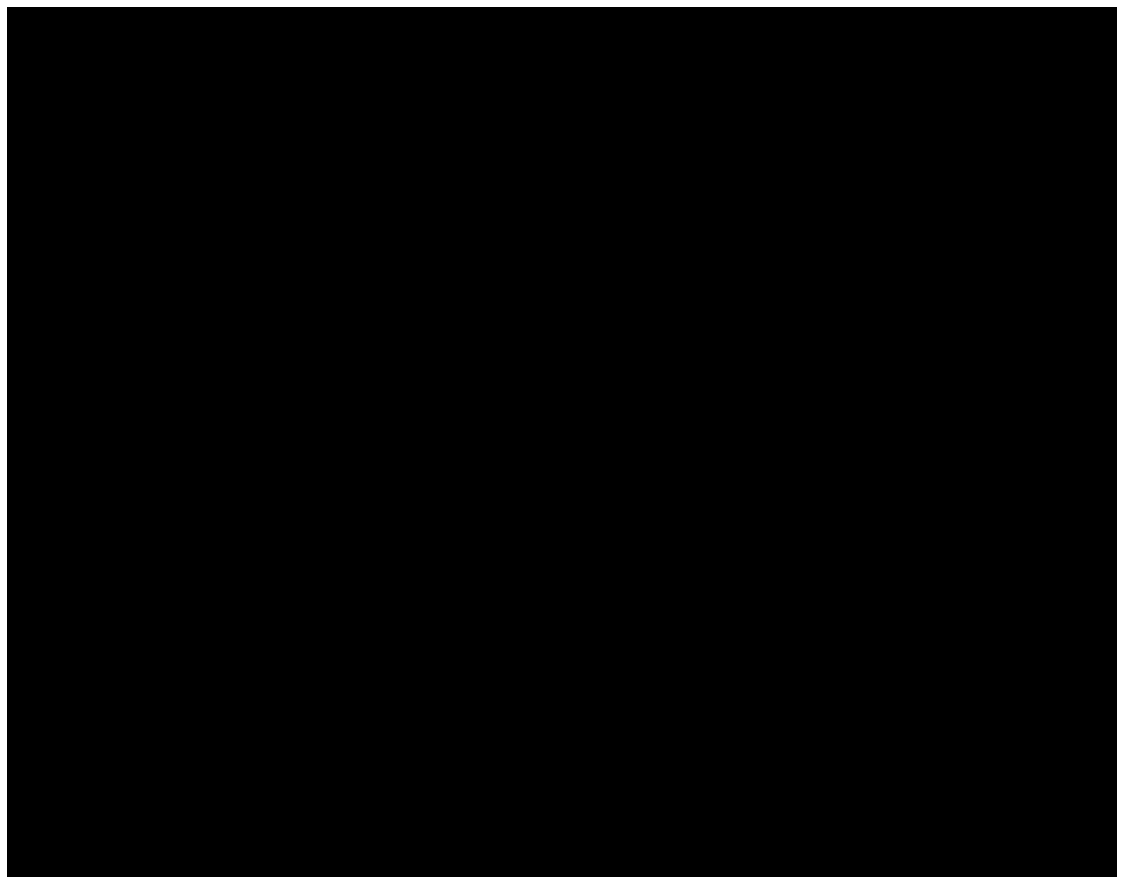

In [10]:
import geopandas as gpd
import rasterio as rio
import rasterio.mask
from skimage import exposure
from rasterio import plot
from rasterio.crs import CRS

# Load polygon vector
boundsdata = r'C:/Users/Massimo/Documents/SchoolFolder/ThirdYear/Thesis/MassThesis/src/References/malta.geojson'
region = gpd.read_file(boundsdata)
region

nReserve_proj = region.to_crs({'init': 'epsg:4326'})

with rio.open("fulltestTiff.tif") as src:
                out_image, out_transform = rio.mask.mask(src, nReserve_proj.geometry,crop=True)
                out_meta = src.meta.copy()
                out_meta.update({"driver": "GTiff",
                             "height": out_image.shape[1],
                             "width": out_image.shape[2],
                             "transform": out_transform,
                             "dtype": "uint16"})

# Rescale the image (divide by 10000 to convert to [0:1] reflectance
image = np.array(out_image[[2,1,0], :, :])
p2, p98 = np.percentile(image, (2,98))
image = exposure.rescale_intensity(image, in_range=(p2, p98)) / 100000

rgb = np.array(image.transpose(1,2,0))

#Plot and save image with Matplotlib
fig = plt.figure(figsize=(20,16))
ax=fig.add_subplot(1,1,1)
#fig.suptitle("BOLD TITLE")
plt.axis('off')
plt.imshow(rgb)

#Save scaled reflectance image
# Call 'savefig' to save this plot to an image file
file_to_save = 'test3.png'
plt.savefig(file_to_save)
plt.show()

test 4

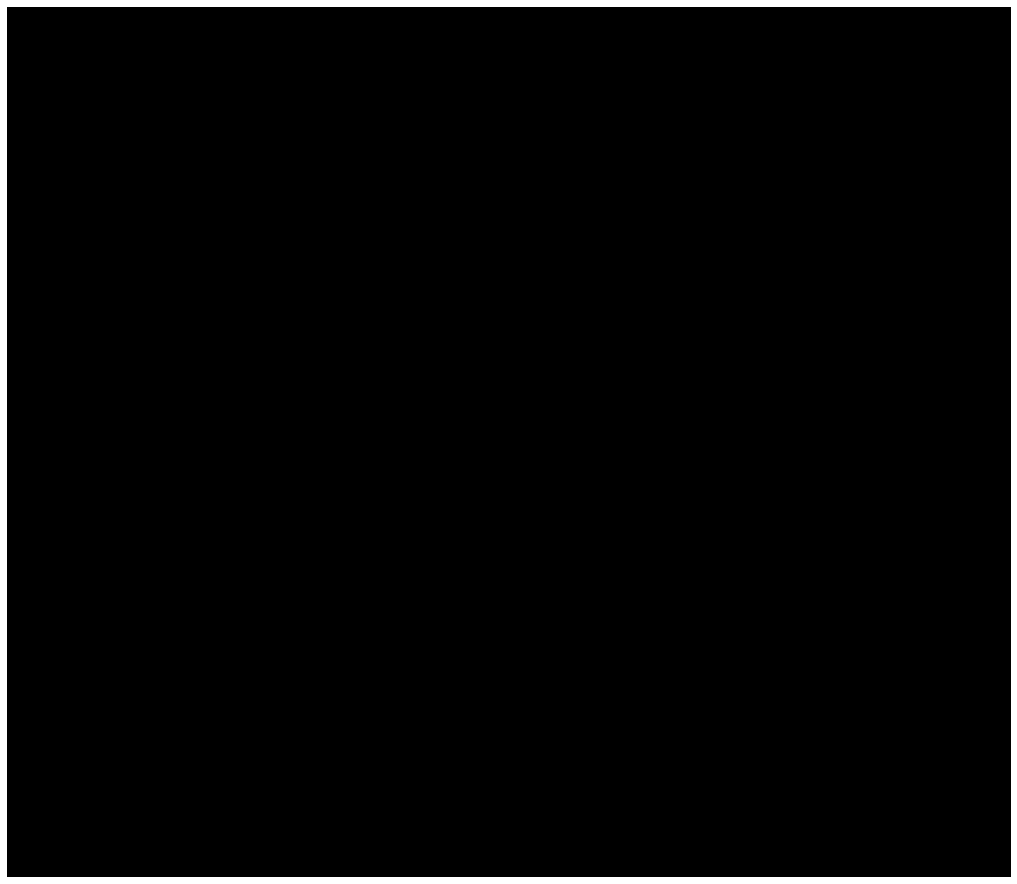

In [25]:
import numpy as np
import rasterio
from rasterio.warp import calculate_default_transform, reproject, Resampling
from skimage import exposure
from rasterio import plot
import matplotlib.pyplot as plt

#dst_crs = 'EPSG:32633'
#dst_crs = 'EPSG:4326' 
dst_crs = 'EPSG:3857' 

with rasterio.open('fulltestTiff.tif') as src:
    transform, width, height = calculate_default_transform(
        src.crs, dst_crs, src.width, src.height, *src.bounds)
    kwargs = src.meta.copy()
    kwargs.update({
        'crs': dst_crs,
        'transform': transform,
        'width': width,
        'height': height
    })

    with rasterio.open('3857.tif', 'w', **kwargs) as dst:
        for i in range(1, src.count + 1):
            reproject(
                source=rasterio.band(src, i),
                destination=rasterio.band(dst, i),
                src_transform=src.transform,
                src_crs=src.crs,
                dst_transform=transform,
                dst_crs=dst_crs,
                resampling=Resampling.nearest)

# Load polygon vector
boundsdata = r'C:/Users/Massimo/Documents/SchoolFolder/ThirdYear/Thesis/SentinelData/ShapeFile/malta2.geojson'
region = gpd.read_file(boundsdata)
region

nReserve_proj = region.to_crs({'init': 'epsg:3857'})

with rio.open("3857.tif") as src:
                out_image, out_transform = rio.mask.mask(src, nReserve_proj.geometry,crop=True)
                out_meta = src.meta.copy()
                out_meta.update({"driver": "GTiff",
                             "height": out_image.shape[1],
                             "width": out_image.shape[2],
                             "transform": out_transform,
                             "dtype": "uint16"})

# Rescale the image (divide by 10000 to convert to [0:1] reflectance
image = np.array(out_image[[2,1,0], :, :])
#p2, p98 = np.percentile(image, (2,98))
#image = exposure.rescale_intensity(image, in_range=(p2, p98)) / 100000

rgb = np.array(image.transpose(1,2,0))

#Plot and save image with Matplotlib
fig = plt.figure(figsize=(20,16))
ax=fig.add_subplot(1,1,1)
#fig.suptitle("BOLD TITLE")
plt.axis('off')
plt.imshow(rgb)

#Save scaled reflectance image
# Call 'savefig' to save this plot to an image file
file_to_save = 'test4.png'
plt.savefig(file_to_save)
plt.show()

test 5

https://gis.stackexchange.com/questions/395666/georeferencing-sentinel-3-lst-product

test 6

In [2]:
#import rioxarray
import xarray
import rasterio

path_pc = 'H:/Thesis Sentinel Data/2018/covid/05-May/S3A_SL_2_LST____20180523T190820_20180523T204919_20180525T030656_6059_031_270______LN2_O_NT_003/'\
       'S3A_SL_2_LST____20180523T190820_20180523T204919_20180525T030656_6059_031_270______LN2_O_NT_003.SEN3'
path_laptop = 'C:/Users/Massimo/Documents/SchoolFolder/ThirdYear/Thesis/SentinelData/2021/extra/' \
       'S3B_SL_2_LST____20210616T094035_20210616T094335_20210617T190722_0179_053_307_2340_LN2_O_NT_004.SEN3'

##Set up path
path = path_laptop

#creating filepath names
climate_filepath = (path + "/LST_in.nc")
cart_filepath = (path + "/geodetic_in.nc")

dsLST = xarray.open_dataset(climate_filepath)
dsGEO = xarray.open_dataset(cart_filepath)

##Showing off datasets
#print(str(dsLST) + '\n---------------------------------\n\n' + str(dsGEO))

##Showing off variables
print(dsLST['LST'])
print(dsGEO['longitude_in'])
print(dsGEO['latitude_in']) 


<xarray.DataArray 'LST' (rows: 1200, columns: 1500)>
[1800000 values with dtype=float32]
Dimensions without coordinates: rows, columns
Attributes:
    long_name:      Gridded Land Surface Temperature
    standard_name:  surface_temperature
    units:          K
    valid_max:      32767
    valid_min:      -32767
<xarray.DataArray 'longitude_in' (rows: 1200, columns: 1500)>
[1800000 values with dtype=float64]
Dimensions without coordinates: rows, columns
Attributes:
    long_name:      Longitude of detector FOV centre on the earth's surface
    standard_name:  longitude
    units:          degrees_east
    valid_max:      180000000
    valid_min:      -180000000
<xarray.DataArray 'latitude_in' (rows: 1200, columns: 1500)>
[1800000 values with dtype=float64]
Dimensions without coordinates: rows, columns
Attributes:
    long_name:      Latitude of detector FOV centre on the earth's surface
    standard_name:  latitude
    units:          degrees_north
    valid_max:      90000000
    val

In [4]:
##Merging
dsLST = dsLST.merge(dsGEO)
print(dsLST)

<xarray.Dataset>
Dimensions:                 (columns: 1500, orphan_pixels: 187, rows: 1200)
Dimensions without coordinates: columns, orphan_pixels, rows
Data variables:
    LST                     (rows, columns) float32 ...
    LST_orphan              (rows, orphan_pixels) float32 ...
    LST_uncertainty         (rows, columns) float32 ...
    LST_uncertainty_orphan  (rows, orphan_pixels) float32 ...
    exception               (rows, columns) int16 ...
    exception_orphan        (rows, orphan_pixels) int16 ...
    elevation_in            (rows, columns) float32 nan nan nan ... nan nan nan
    elevation_orphan_in     (rows, orphan_pixels) float32 45.0 45.0 ... nan nan
    latitude_in             (rows, columns) float64 42.0 42.0 ... 28.69 28.69
    latitude_orphan_in      (rows, orphan_pixels) float64 41.52 41.52 ... nan
    longitude_in            (rows, columns) float64 0.565 0.577 ... 14.09 14.1
    longitude_orphan_in     (rows, orphan_pixels) float64 5.094 5.127 ... nan
Attribu

In [ ]:
##Writing CRS (optional?)
dsLST.rio.write_crs("epsg:4326", inplace=True)

In [5]:
dsLST.rio.to_raster('C:/Users/Massimo/Documents/SchoolFolder/ThirdYear/Thesis/SentinelData/TIF_files/test.tif')

MemoryError: Unable to allocate 30.1 GiB for an array with shape (12, 1200, 1500, 187) and data type float64